# Abstract :
## In this assignment I am working on 'Weather Prediction Dataset' to predict Humidity3pm using linear regression and classify RainTomorrow using Logistic Regression. The dataset contains around 100000+ records with 15 features. The first step is to clean and prepare the data by removing the NaN values and replacing them with the mean. I have used label encoding to transform the string values into categorical numerical values. For exploratory data analysis I have used scatter plots, pairplot, heatmap and barplot.I have also applied elimination, ridge  and RFE techniques to select features. I have also checked my assumptions using QQ plots for multivariate normality, scatter plots to detect the linear relationship between the features and many more which are described in detail below. I have applied cross validation to make sure my model is not overfitting for all three linear regression,logistic regression and step wise method. I have compared and constrasted the evaluation metrics for this methods by using evaluation metrics such as R^2, AIC, BIC,RMSE, decision function to generate proper summary of how well the model fit on the data. Also data passed to all three models though is same when compared with raw data, but I have used methods such as regularization, smoothing, missing value handling using smoothing on various models based on the requirements. I have also tried to introduce bias on the regression line by introducing L2 regularization towards the end.

## Model 1

In [266]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
import random

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import Imputer
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [267]:
df = pd.read_csv('weatherAUS.csv')

In [268]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [280]:
df.count()

Date             142193
Location         142193
MinTemp          141556
MaxTemp          142193
Rainfall         142193
Evaporation      142193
Sunshine         142193
WindGustDir      132863
WindGustSpeed    132923
WindDir9am       132180
WindDir3pm       142193
WindSpeed9am     140845
WindSpeed3pm     139563
Humidity9am      142193
Humidity3pm      142193
Pressure9am      128179
Pressure3pm      128212
Cloud9am         142193
Cloud3pm         142193
Temp9am          142193
Temp3pm          142193
RainToday        140787
RISK_MM          142193
RainTomorrow     142193
trans_loc        142193
dtype: int64

### Data Preparation and Cleaning

In [279]:

df[['Sunshine','Temp9am','Humidity9am', 'Humidity3pm', 'Cloud3pm', 'Rainfall', 'Cloud9am','Evaporation', 'MaxTemp','Temp3pm']] = df[['Sunshine','Temp9am','Humidity9am', 'Humidity3pm', 'Cloud3pm', 'Rainfall','Cloud9am','Evaporation', 'MaxTemp','Temp3pm']].fillna(df[['Sunshine','Temp9am','Humidity9am', 'Humidity3pm', 'Cloud3pm', 'Rainfall','Cloud9am','Evaporation', 'MaxTemp','Temp3pm']].mean())
# df['Sunshine']
#sun_array = df[df['Sunshine','Temp9am','Humidity9am','Humidity3pm','Cloud3pm']!=np.nan]['Sunshine','Temp9am','Humidity9am','Humidity3pm','Cloud3pm']
#df['Sunshine','Temp9am','Humidity9am','Humidity3pm','Cloud3pm'].replace(np.nan,sun_array.mean())



In [282]:
df.isnull().sum()


Date                 0
Location             0
MinTemp            637
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am          0
Humidity3pm          0
Pressure9am      14014
Pressure3pm      13981
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RISK_MM              0
RainTomorrow         0
trans_loc            0
dtype: int64

In [281]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,trans_loc
0,2008-12-01,Albury,13.4,22.9,0.600000,5.469824,7.624853,W,44.0,W,...,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,0.0,No,2
1,2008-12-02,Albury,7.4,25.1,0.000000,5.469824,7.624853,WNW,44.0,NNW,...,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,0.0,No,2
2,2008-12-03,Albury,12.9,25.7,0.000000,5.469824,7.624853,WSW,46.0,W,...,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,0.0,No,2
3,2008-12-04,Albury,9.2,28.0,0.000000,5.469824,7.624853,NE,24.0,SE,...,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,1.0,No,2
4,2008-12-05,Albury,17.5,32.3,1.000000,5.469824,7.624853,W,41.0,ENE,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0.2,No,2
5,2008-12-06,Albury,14.6,29.7,0.200000,5.469824,7.624853,WNW,56.0,W,...,1009.2,1005.4,4.437189,4.503167,20.6,28.9,No,0.0,No,2
6,2008-12-07,Albury,14.3,25.0,0.000000,5.469824,7.624853,W,50.0,SW,...,1009.6,1008.2,1.000000,4.503167,18.1,24.6,No,0.0,No,2
7,2008-12-08,Albury,7.7,26.7,0.000000,5.469824,7.624853,W,35.0,SSE,...,1013.4,1010.1,4.437189,4.503167,16.3,25.5,No,0.0,No,2
8,2008-12-09,Albury,9.7,31.9,0.000000,5.469824,7.624853,NNW,80.0,SE,...,1008.9,1003.6,4.437189,4.503167,18.3,30.2,No,1.4,Yes,2
9,2008-12-10,Albury,13.1,30.1,1.400000,5.469824,7.624853,W,28.0,S,...,1007.0,1005.7,4.437189,4.503167,20.1,28.2,Yes,0.0,No,2


#### Filled the NaNs with mean values 

In [269]:
le = LabelEncoder()


In [270]:
le.fit(df["Location"])
import copy
k = pd.DataFrame(df["Location"])
print(le.classes_)

transformed_location = le.transform(df["Location"])
transformed_location = pd.DataFrame(transformed_location)
df_copy = copy.copy(df)
df["trans_loc"] = transformed_location

['Adelaide' 'Albany' 'Albury' 'AliceSprings' 'BadgerysCreek' 'Ballarat'
 'Bendigo' 'Brisbane' 'Cairns' 'Canberra' 'Cobar' 'CoffsHarbour'
 'Dartmoor' 'Darwin' 'GoldCoast' 'Hobart' 'Katherine' 'Launceston'
 'Melbourne' 'MelbourneAirport' 'Mildura' 'Moree' 'MountGambier'
 'MountGinini' 'Newcastle' 'Nhil' 'NorahHead' 'NorfolkIsland' 'Nuriootpa'
 'PearceRAAF' 'Penrith' 'Perth' 'PerthAirport' 'Portland' 'Richmond'
 'Sale' 'SalmonGums' 'Sydney' 'SydneyAirport' 'Townsville' 'Tuggeranong'
 'Uluru' 'WaggaWagga' 'Walpole' 'Watsonia' 'Williamtown' 'Witchcliffe'
 'Wollongong' 'Woomera']


In [271]:
df[["trans_loc","Location"]]

,trans_loc,Location
0,2,Albury
1,2,Albury
2,2,Albury
3,2,Albury
4,2,Albury
5,2,Albury
6,2,Albury
7,2,Albury
8,2,Albury
9,2,Albury


In [272]:
le.transform(list(le.classes_))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
      dtype=int64)

In [273]:
type('WindDir3pm')

str

In [274]:
df['WindDir3pm'] = df['WindDir3pm'].astype('object')

In [275]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
trans_loc          int32
dtype: object

In [276]:
df['WindDir3pm'] = df['WindDir3pm'].fillna(' ')
df['WindDir3pm'].isnull().sum()

0

In [277]:
df.WindDir3pm.unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', ' ', 'NE'], dtype=object)

In [278]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,trans_loc
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682,23.740655
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969,14.237503
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,11.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,24.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000,36.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,48.000000


In [283]:
le.fit(df['WindDir3pm'])

k = pd.DataFrame(df['WindDir3pm'])


transformed_WindDir = le.transform(df['WindDir3pm'])
transformed_WindDir = pd.DataFrame(transformed_WindDir)

df['WindDir'] = transformed_WindDir

In [284]:
df[['WindDir','WindDir3pm']]

,WindDir,WindDir3pm
0,15,WNW
1,16,WSW
2,16,WSW
3,1,E
4,8,NW
5,14,W
6,14,W
7,14,W
8,8,NW
9,11,SSE


In [285]:
# raindf = pd.DataFrame(df['RainToday'])
# raindf.isnull().fillna('')
# rainTodayArr = np.array(raindf)
# for i in range(rainTodayArr.size):
#     if rainTodayArr[i] == 'No':
#         rainTodayArr[i] = 0
#     elif rainTodayArr[i] == 'Yes':
#         rainTodayArr[i] = 1
#     else:
#         rainTodayArr[i] = 2

# raindf = pd.DataFrame(data=rainTodayArr)

# df['RainToday_numerical'] = raindf.values
# type(raintdf)
# print(raintdf)
le.fit(df['RainTomorrow'])

k = pd.DataFrame(df['RainTomorrow'])


transformed_RainTom = le.transform(df['RainTomorrow'])

transformed_RainTom = pd.DataFrame(transformed_RainTom)

df['RainTomorrow'] = transformed_RainTom

In [286]:
df['RainTomorrow']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         1
9         0
10        1
11        1
12        1
13        0
14        0
15        1
16        1
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        1
28        0
29        0
         ..
142163    0
142164    0
142165    0
142166    0
142167    0
142168    0
142169    0
142170    0
142171    0
142172    0
142173    0
142174    0
142175    0
142176    0
142177    0
142178    0
142179    0
142180    0
142181    0
142182    0
142183    0
142184    0
142185    0
142186    0
142187    0
142188    0
142189    0
142190    0
142191    0
142192    0
Name: RainTomorrow, Length: 142193, dtype: int32

In [287]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,trans_loc,WindDir
0,2008-12-01,Albury,13.4,22.9,0.600000,5.469824,7.624853,W,44.0,W,...,1007.1,8.000000,4.503167,16.9,21.8,No,0.0,0,2,15
1,2008-12-02,Albury,7.4,25.1,0.000000,5.469824,7.624853,WNW,44.0,NNW,...,1007.8,4.437189,4.503167,17.2,24.3,No,0.0,0,2,16
2,2008-12-03,Albury,12.9,25.7,0.000000,5.469824,7.624853,WSW,46.0,W,...,1008.7,4.437189,2.000000,21.0,23.2,No,0.0,0,2,16
3,2008-12-04,Albury,9.2,28.0,0.000000,5.469824,7.624853,NE,24.0,SE,...,1012.8,4.437189,4.503167,18.1,26.5,No,1.0,0,2,1
4,2008-12-05,Albury,17.5,32.3,1.000000,5.469824,7.624853,W,41.0,ENE,...,1006.0,7.000000,8.000000,17.8,29.7,No,0.2,0,2,8
5,2008-12-06,Albury,14.6,29.7,0.200000,5.469824,7.624853,WNW,56.0,W,...,1005.4,4.437189,4.503167,20.6,28.9,No,0.0,0,2,14
6,2008-12-07,Albury,14.3,25.0,0.000000,5.469824,7.624853,W,50.0,SW,...,1008.2,1.000000,4.503167,18.1,24.6,No,0.0,0,2,14
7,2008-12-08,Albury,7.7,26.7,0.000000,5.469824,7.624853,W,35.0,SSE,...,1010.1,4.437189,4.503167,16.3,25.5,No,0.0,0,2,14
8,2008-12-09,Albury,9.7,31.9,0.000000,5.469824,7.624853,NNW,80.0,SE,...,1003.6,4.437189,4.503167,18.3,30.2,No,1.4,1,2,8
9,2008-12-10,Albury,13.1,30.1,1.400000,5.469824,7.624853,W,28.0,S,...,1005.7,4.437189,4.503167,20.1,28.2,Yes,0.0,0,2,11


#### Using Label Encoding string values were transformed into numeric values.

## Visualization of data

In [288]:
df.groupby('Location')[['Humidity3pm']].median()

,Humidity3pm
Location,
Adelaide,44.000000
Albany,63.000000
Albury,47.000000
AliceSprings,19.000000
BadgerysCreek,50.000000
Ballarat,59.000000
Bendigo,45.000000
Brisbane,53.000000
Cairns,61.000000


In [289]:
top_location = df.groupby('Location',as_index = False)[['Humidity3pm']].median()
type(top_location)
print(top_location)

            Location  Humidity3pm
0           Adelaide    44.000000
1             Albany    63.000000
2             Albury    47.000000
3       AliceSprings    19.000000
4      BadgerysCreek    50.000000
5           Ballarat    59.000000
6            Bendigo    45.000000
7           Brisbane    53.000000
8             Cairns    61.000000
9           Canberra    44.000000
10             Cobar    31.000000
11      CoffsHarbour    63.000000
12          Dartmoor    62.000000
13            Darwin    53.000000
14         GoldCoast    63.000000
15            Hobart    51.000000
16         Katherine    51.482606
17        Launceston    56.000000
18         Melbourne    50.000000
19  MelbourneAirport    50.000000
20           Mildura    33.000000
21             Moree    32.000000
22      MountGambier    57.000000
23       MountGinini    66.000000
24         Newcastle    51.482606
25              Nhil    43.000000
26         NorahHead    69.000000
27     NorfolkIsland    66.000000
28         Nur

In [290]:
top_sort = top_location.sort_values(by = 'Humidity3pm',ascending = False)

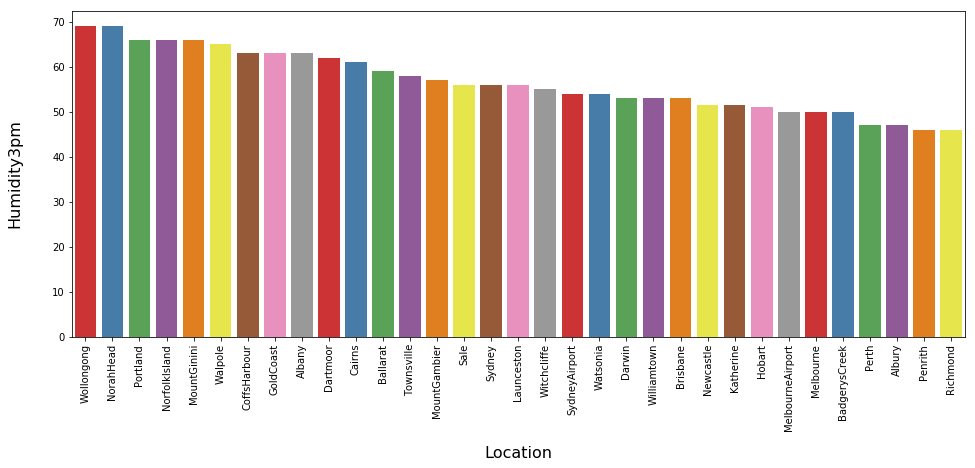

In [291]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Location', y='Humidity3pm', data=top_sort.head(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)

plt.show()

c:\users\dsinf\miniconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\dsinf\miniconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


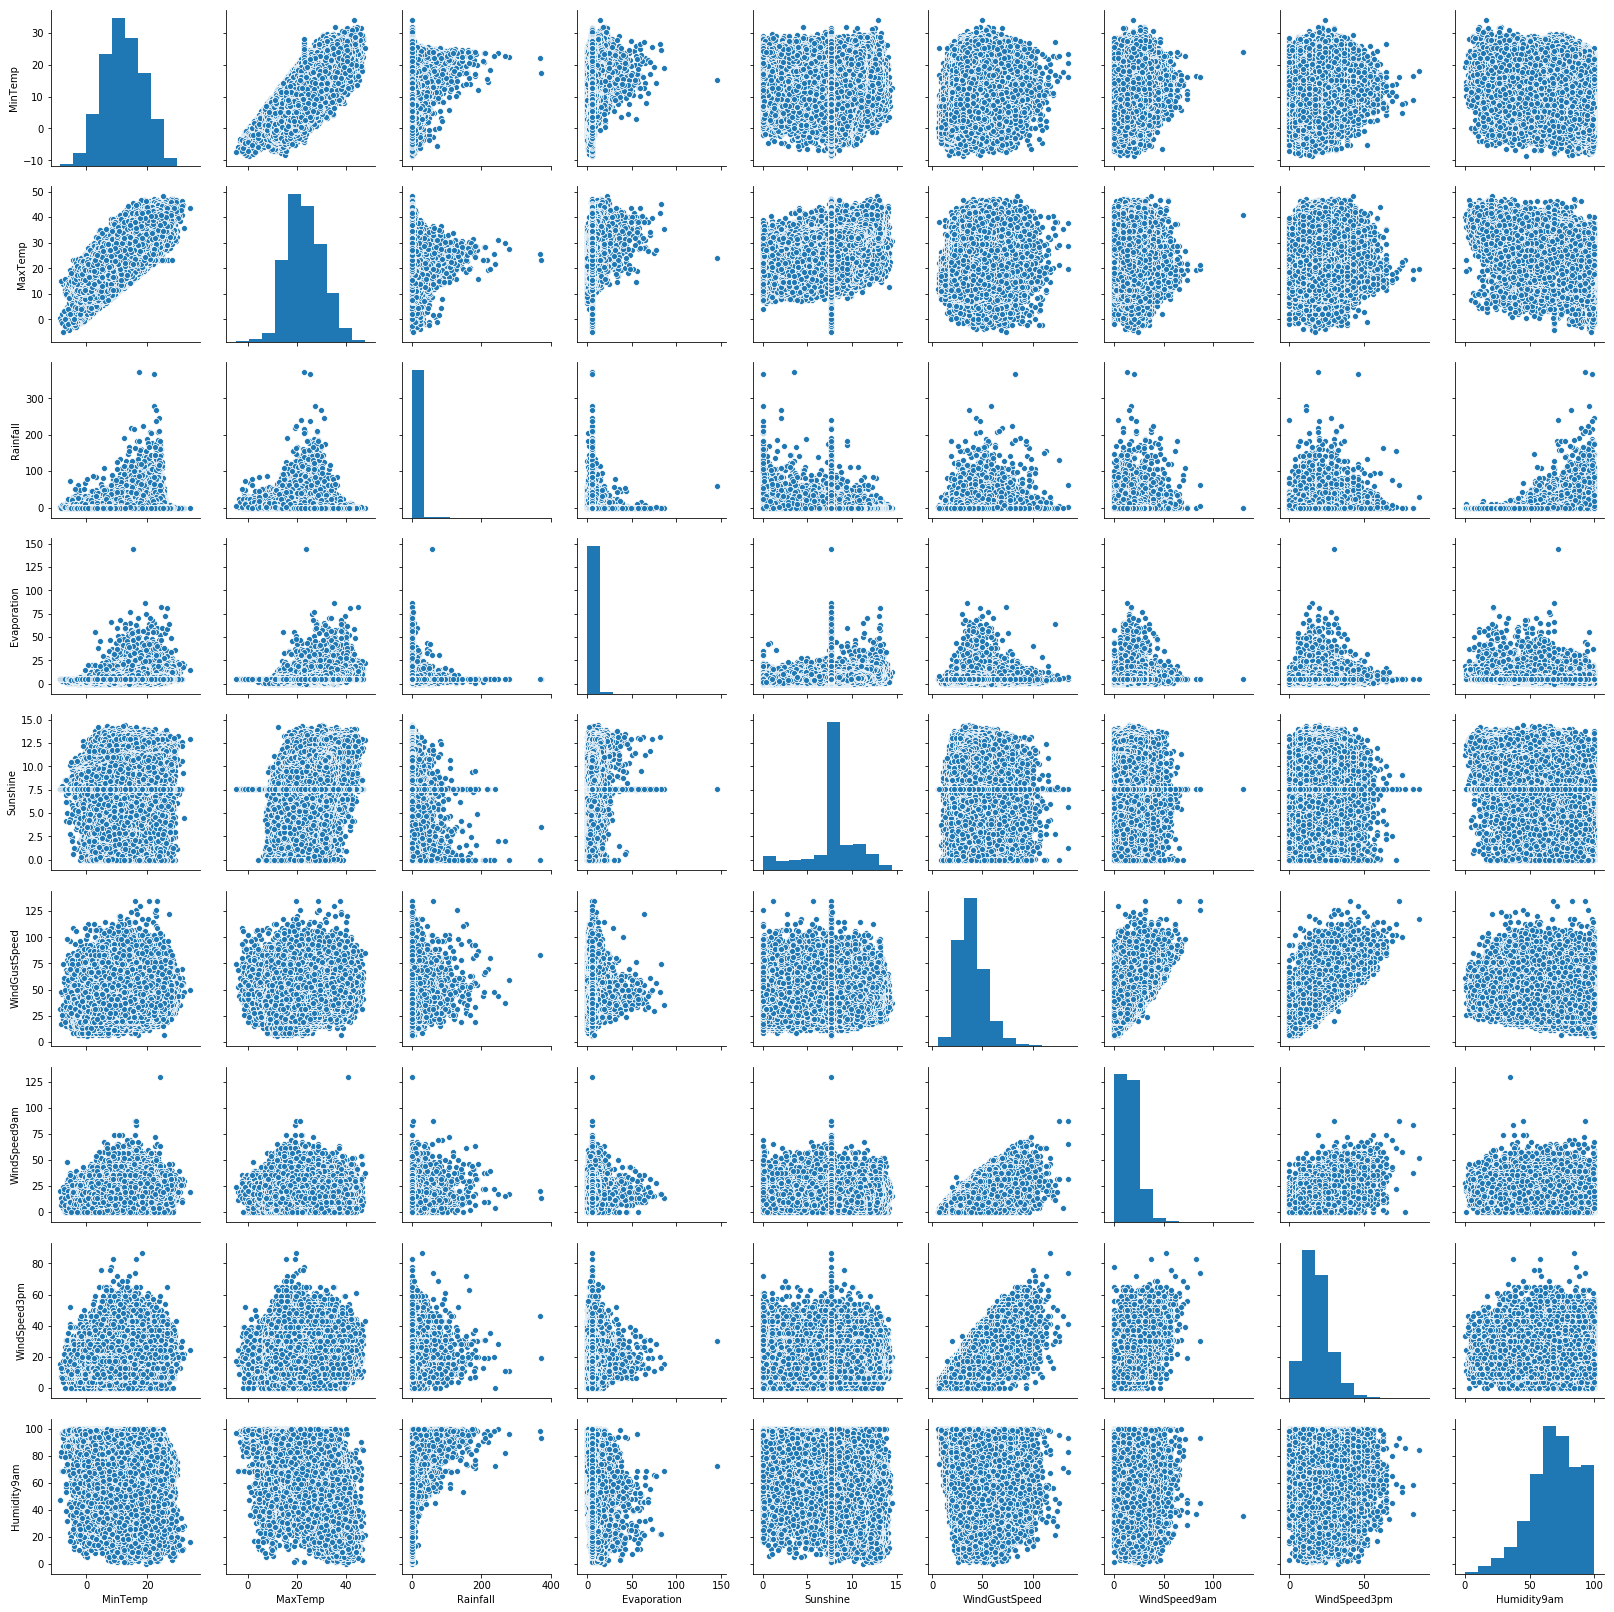

In [294]:
sns.pairplot(df)

# Model 1

##  Linear Regression
#### Humidity3pm as dependent variable

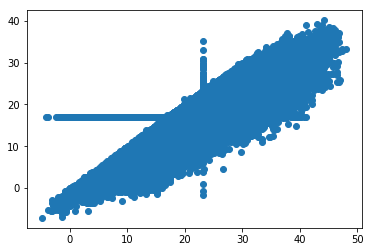

In [292]:
plt.scatter(x = df['MaxTemp'], y = df['Temp9am'])


#### Here we checked if there is multicollinearity between the features MaxTemp and Temp9am and we observe that there is little collinearity between them by using scatter plot.

### Checking which independent variables shows significant relation with the dependent variable.

In [300]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow,trans_loc,WindDir
MinTemp,1.000000,0.735678,0.103808,0.353938,0.051941,0.177285,0.176005,0.175749,-0.232586,0.005920,-0.451260,-0.461623,0.061539,0.015924,0.898633,0.700962,0.124743,0.083936,-0.006202,-0.145823
MaxTemp,0.735678,1.000000,-0.074202,0.442214,0.331505,0.067679,0.014662,0.050760,-0.499777,-0.499725,-0.332135,-0.427066,-0.226776,-0.214469,0.880087,0.969735,-0.044154,-0.159087,-0.020490,-0.158061
Rainfall,0.103808,-0.074202,1.000000,-0.038186,-0.173011,0.132772,0.086403,0.057454,0.221392,0.249609,-0.167325,-0.126114,0.171613,0.145848,0.011384,-0.077553,0.301844,0.236874,-0.003457,0.042696
Evaporation,0.353938,0.442214,-0.038186,1.000000,0.290375,0.151093,0.142050,0.094557,-0.377594,-0.289915,-0.212188,-0.231705,-0.152224,-0.147763,0.417323,0.429195,-0.031569,-0.089551,0.032114,-0.038017
Sunshine,0.051941,0.331505,-0.173011,0.290375,1.000000,-0.023158,0.005691,0.039592,-0.351980,-0.446849,0.030960,-0.015491,-0.537714,-0.559379,0.210174,0.349271,-0.222487,-0.327029,0.002144,-0.024654
WindGustSpeed,0.177285,0.067679,0.132772,0.151093,-0.023158,1.000000,0.604837,0.686419,-0.214012,-0.026464,-0.457891,-0.412922,0.054735,0.083344,0.149774,0.032836,0.162923,0.234010,0.072039,0.150576
WindSpeed9am,0.176005,0.014662,0.086403,0.142050,0.005691,0.604837,1.000000,0.519971,-0.269647,-0.031124,-0.227923,-0.174916,0.019193,0.041145,0.129119,0.005048,0.069404,0.090995,0.077313,0.072950
WindSpeed3pm,0.175749,0.050760,0.057454,0.094557,0.039592,0.686419,0.519971,1.000000,-0.145216,0.015834,-0.295567,-0.254988,0.041751,0.019822,0.163201,0.028514,0.049240,0.087817,0.064784,0.124321
Humidity9am,-0.232586,-0.499777,0.221392,-0.377594,-0.351980,-0.214012,-0.269647,-0.145216,1.000000,0.659852,0.138859,0.185988,0.354394,0.274613,-0.471137,-0.492430,0.170541,0.255158,-0.002065,0.004543
Humidity3pm,0.005920,-0.499725,0.249609,-0.289915,-0.446849,-0.026464,-0.031124,0.015834,0.659852,1.000000,-0.027239,0.051302,0.400006,0.407898,-0.217593,-0.555777,0.306711,0.439678,0.011066,-0.018472


In [293]:
df = df.iloc[:,1:14]

In [295]:
# choose attributes which shows relation
x = df[['Humidity3pm','Humidity9am','Temp9am','Sunshine','RainTomorrow','WindDir']]

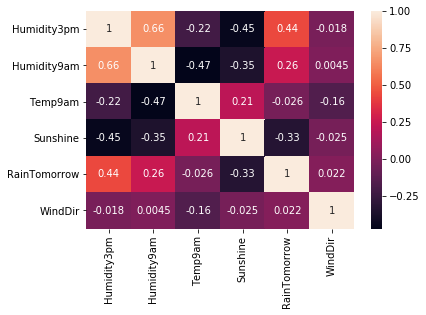

In [301]:
sns.heatmap(x.corr(), annot=True)

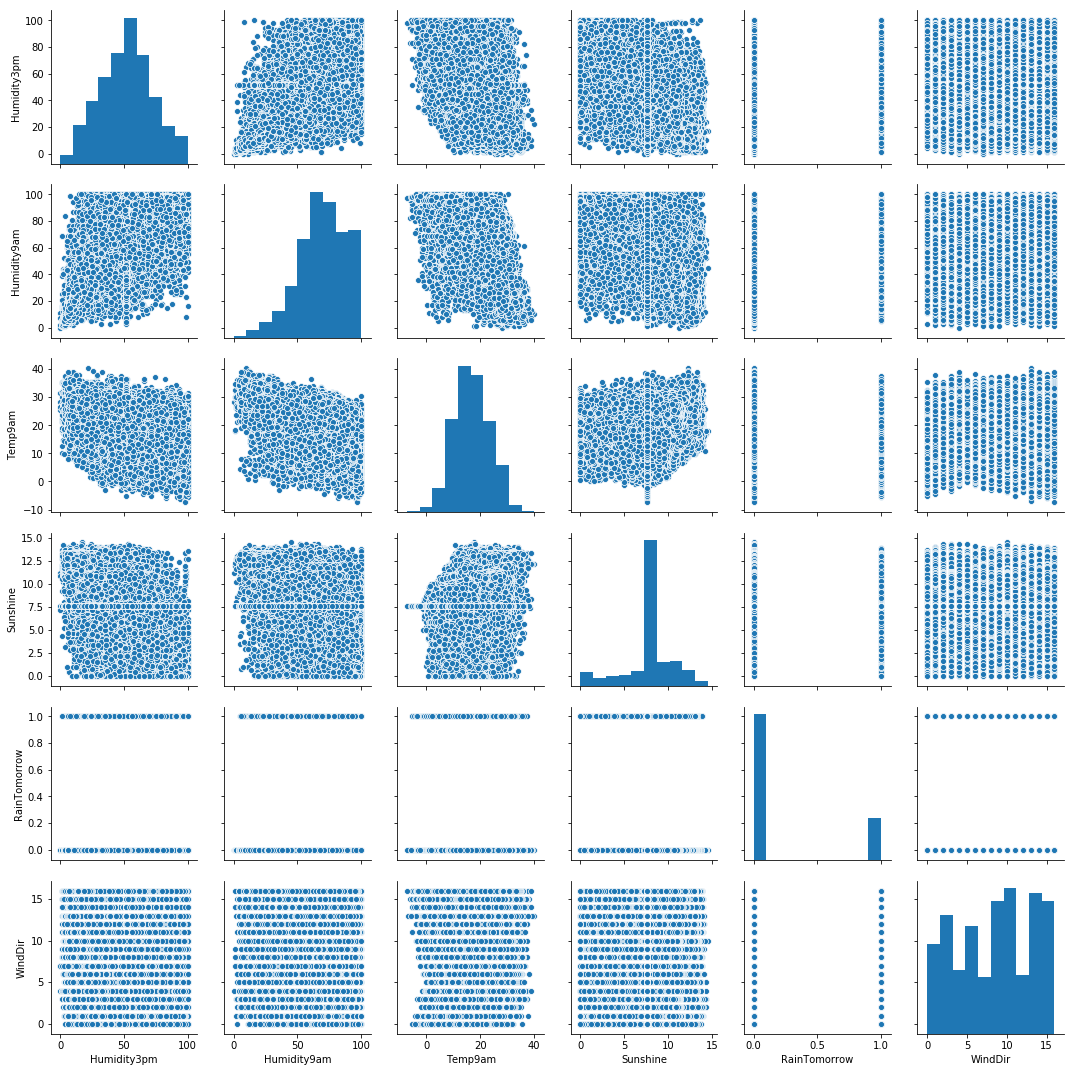

In [296]:
sns.pairplot(x)
plt.show()

### Scaling the data and checking the outliers

In [297]:
def scaled_df(df):
    scaled = pd.DataFrame()
    for item in df:
        if item in df.select_dtypes(include=[np.float]):
            scaled[item] = ((df[item] - df[item].min()) / 
            (df[item].max() - df[item].min()))
        else: 
            scaled[item] = df[item]
    return scaled
weather_scaled = scaled_df(df)

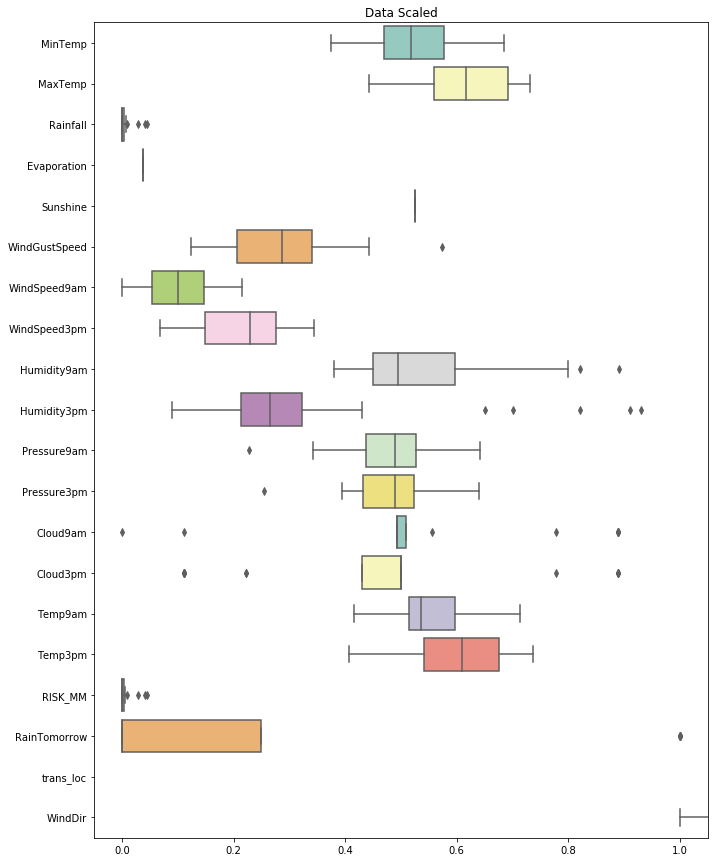

In [298]:
f, ax = plt.subplots(figsize=(11, 15))


plt.title("Data Scaled")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = weather_scaled[1:29], 
  orient = 'h', 
  palette = 'Set3')

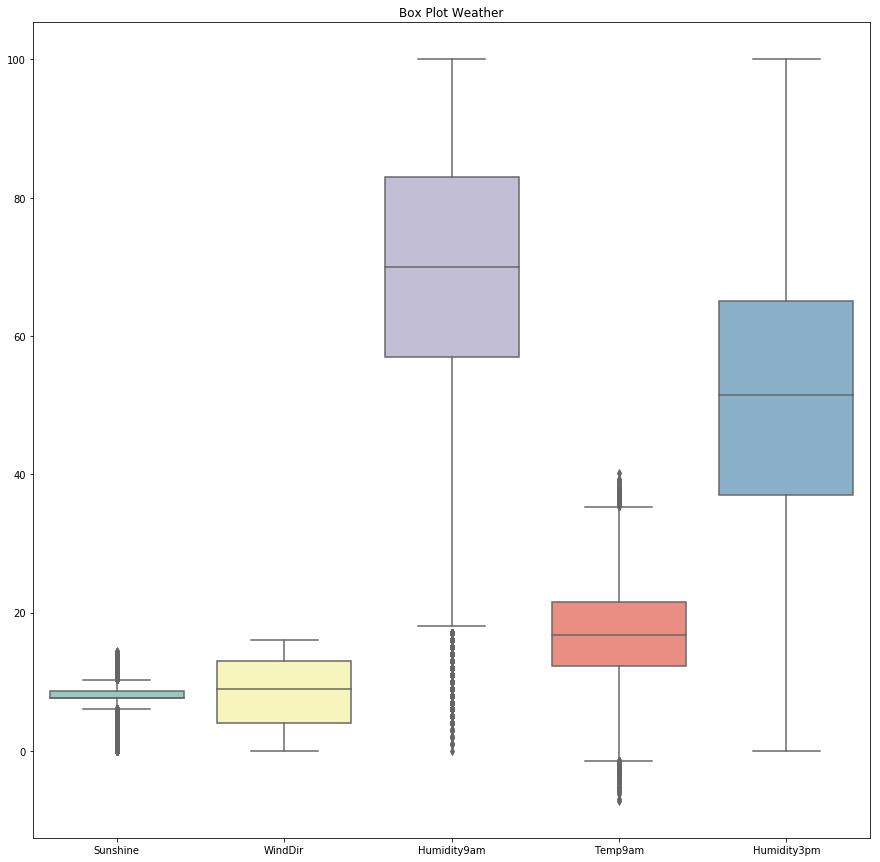

In [299]:
f, ax = plt.subplots(figsize=(15, 15))
chk=df[['Sunshine', 'WindDir','Humidity9am','Temp9am','Humidity3pm']]

plt.title("Box Plot Weather")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = df[['Sunshine', 'WindDir','Humidity9am','Temp9am','Humidity3pm']], orient = 'v', palette = 'Set3')

### Is the relationship significant?
#### As the p-value is much less than 0.05, we reject the null hypothesis that β = 0.Hence there is a significant relationship between the variables in the linear regression model of the dataset. Hence, the model has a significant relationship

In [302]:
model = ols("Humidity3pm ~ Temp9am + WindDir + Sunshine + Humidity9am + RainTomorrow", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Humidity3pm   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                 3.453e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        02:00:02   Log-Likelihood:            -5.7495e+05
No. Observations:              142193   AIC:                         1.150e+06
Df Residuals:                  142187   BIC:                         1.150e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       11.4440      0.290     39.506      0.000      10.876      12.012
Temp9am          0.3147      0.007     47.833      0.000       0.302       0.328
WindDir         -0.0656      0.008     -8.388      0.000      -0.081      -0.050
Sunshine        -1.4060      0.015    -94.565      0.000      -1.435      -1.377
Humidity9am      0.6304      0.002    268.549      0.000       0.626       0.635
RainTomorrow    11.4702      0.095    120.857      0.000      11.284      11.656
==============================================================================
Omnibus:                      352.117   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.403
Skew:                           0.106   Prob(JB):                     7.43e-80
Kurtosis:                       3.127   Cond. No.                         586.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [303]:
model = ols("Humidity3pm ~ Temp9am + WindDir + Sunshine + Humidity9am + RainTomorrow -1", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Humidity3pm   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 4.254e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        02:00:02   Log-Likelihood:            -5.7573e+05
No. Observations:              142193   AIC:                         1.151e+06
Df Residuals:                  142188   BIC:                         1.152e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Temp9am          0.4804      0.005     94.265      0.000       0.470       0.490
WindDir          0.0415      0.007      5.622      0.000       0.027       0.056
Sunshine        -1.1100      0.013    -85.963      0.000      -1.135      -1.085
Humidity9am      0.7070      0.001    530.863      0.000       0.704       0.710
RainTomorrow    11.4926      0.095    120.436      0.000      11.306      11.680
==============================================================================
Omnibus:                      536.413   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.566
Skew:                           0.087   Prob(JB):                    8.00e-140
Kurtosis:                       3.279   Cond. No.                         192.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assumptions of Linear Regression:

#### 1. From the scatter plots above we observe that there is linear relationship between the dependent and independent variables.

#### 2. There should be little or no multicollinearity in the data which can be tested by the following criteria:
#### a. Correlation matrix, HeatMap
#### b. Tolerance
#### c. Variance Inflation Factor (VIF)

### Checking for Multicollinearity:

In [304]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow,trans_loc,WindDir
MinTemp,1.000000,0.735678,0.103808,0.353938,0.051941,0.177285,0.176005,0.175749,-0.232586,0.005920,-0.451260,-0.461623,0.061539,0.015924,0.898633,0.700962,0.124743,0.083936,-0.006202,-0.145823
MaxTemp,0.735678,1.000000,-0.074202,0.442214,0.331505,0.067679,0.014662,0.050760,-0.499777,-0.499725,-0.332135,-0.427066,-0.226776,-0.214469,0.880087,0.969735,-0.044154,-0.159087,-0.020490,-0.158061
Rainfall,0.103808,-0.074202,1.000000,-0.038186,-0.173011,0.132772,0.086403,0.057454,0.221392,0.249609,-0.167325,-0.126114,0.171613,0.145848,0.011384,-0.077553,0.301844,0.236874,-0.003457,0.042696
Evaporation,0.353938,0.442214,-0.038186,1.000000,0.290375,0.151093,0.142050,0.094557,-0.377594,-0.289915,-0.212188,-0.231705,-0.152224,-0.147763,0.417323,0.429195,-0.031569,-0.089551,0.032114,-0.038017
Sunshine,0.051941,0.331505,-0.173011,0.290375,1.000000,-0.023158,0.005691,0.039592,-0.351980,-0.446849,0.030960,-0.015491,-0.537714,-0.559379,0.210174,0.349271,-0.222487,-0.327029,0.002144,-0.024654
WindGustSpeed,0.177285,0.067679,0.132772,0.151093,-0.023158,1.000000,0.604837,0.686419,-0.214012,-0.026464,-0.457891,-0.412922,0.054735,0.083344,0.149774,0.032836,0.162923,0.234010,0.072039,0.150576
WindSpeed9am,0.176005,0.014662,0.086403,0.142050,0.005691,0.604837,1.000000,0.519971,-0.269647,-0.031124,-0.227923,-0.174916,0.019193,0.041145,0.129119,0.005048,0.069404,0.090995,0.077313,0.072950
WindSpeed3pm,0.175749,0.050760,0.057454,0.094557,0.039592,0.686419,0.519971,1.000000,-0.145216,0.015834,-0.295567,-0.254988,0.041751,0.019822,0.163201,0.028514,0.049240,0.087817,0.064784,0.124321
Humidity9am,-0.232586,-0.499777,0.221392,-0.377594,-0.351980,-0.214012,-0.269647,-0.145216,1.000000,0.659852,0.138859,0.185988,0.354394,0.274613,-0.471137,-0.492430,0.170541,0.255158,-0.002065,0.004543
Humidity3pm,0.005920,-0.499725,0.249609,-0.289915,-0.446849,-0.026464,-0.031124,0.015834,0.659852,1.000000,-0.027239,0.051302,0.400006,0.407898,-0.217593,-0.555777,0.306711,0.439678,0.011066,-0.018472


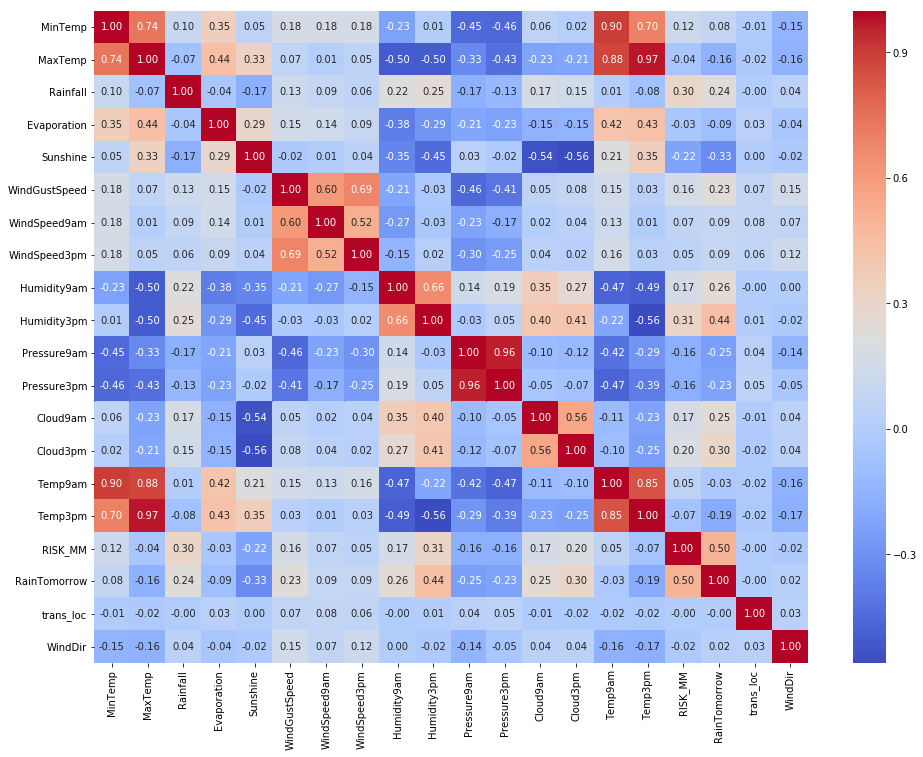

In [305]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,1:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [306]:

T= 1-0.548
print("Test for Tolerance = ",T)
V= 1/T
print("Variance Inflation Factor = ", V)

Test for Tolerance =  0.45199999999999996
Variance Inflation Factor =  2.212389380530974


#### Variance Inflation Factor (VIF) – the variance inflation factor of the linear regression is defined as VIF = 1/T. With VIF > 10 there is an indication that multicollinearity may be present; with VIF > 100 there is certainly multicollinearity among the variables.In the above model, Multicollinearity is not present.



#### 3.  There is little or no autocorrelation in the data
#### Check for Autocorrelation :
#### Durbin-Watson’s d tests the null hypothesis while performing auto-correlation Value of d = 1.254 As a rule of thumb values of 1.5 < d < 2.5 show that there is no auto-correlation in the data, Values from 0 to less than 2 indicate positive autocorrelation.
The Durbin–Watson statistic show a relationship between values separated from each other by a given time lag in the residuals (prediction errors) from a regression analysis.

#### 4.  Requires all variables to be multivariate normal.
#### Checking Multivariate Normality using Q-Q Plot :
#### It is plotting two sets of quantiles against one another If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight. Hence we observe that there is normal distribution in the model.

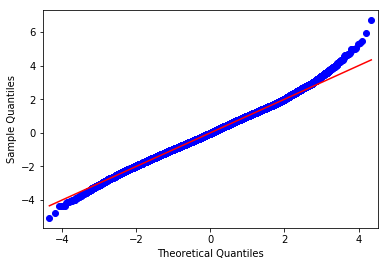

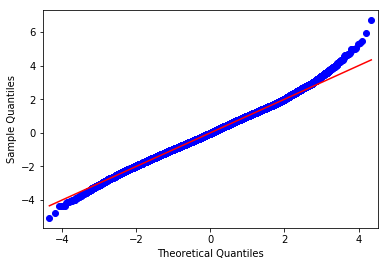

In [307]:
import statsmodels.api as statmodel
plot= model.resid
statmodel.qqplot(plot,line='r', fit= True)

#### 5.  Homoscedasticity Test :
#### The scatter plot is good way to check whether the data are homoscedastic (meaning the residuals are equal across the regression line) using the scatter plot.

In [308]:
model = ols("Humidity3pm ~ Temp9am + Humidity9am + Sunshine + WindDir + RainTomorrow", data=df).fit()
Y_pred = model.predict(df[['Temp9am','Humidity9am', 'Sunshine', 'WindDir', 'RainTomorrow']])
residual = df["Humidity3pm"].values-Y_pred
print(residual)

0        -27.817883
1         -7.825281
2         -0.238663
3        -18.723362
4        -24.495160
5        -17.961204
6        -17.391888
7        -16.194981
8        -34.905860
9        -15.891996
10       -26.677429
11        17.825862
12        27.877413
13        -2.886050
14        -8.704911
15        20.959542
16        -2.308080
17        -2.378416
18        -7.605753
19       -13.382066
20        -4.127696
21       -17.337867
22       -18.449385
23       -20.461916
24       -16.343987
25        -6.023583
26       -27.784854
27       -26.832347
28        17.022651
29        -7.318181
            ...    
142163   -21.134241
142164   -11.658706
142165    -8.869258
142166    -8.096213
142167   -11.457834
142168    -7.455004
142169   -20.035257
142170   -13.035838
142171    -7.842313
142172    -4.125556
142173   -16.724384
142174   -15.426530
142175    -1.603601
142176   -13.955163
142177   -14.438846
142178    -9.542333
142179   -16.370655
142180    -9.636747
142181    -7.833654


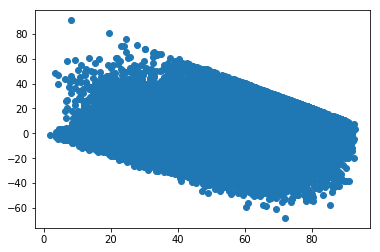

In [309]:

plt.scatter(Y_pred,residual)
plt.show()

#### Therefore, no model assumptions are violated.

### Fitting the model

In [378]:
cols_to_use = ['Temp9am', 'Sunshine', 'WindDir','RainTomorrow','Humidity9am']
X = df[cols_to_use]
y = df.Humidity3pm

In [379]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)
print(X_train, X_test, y_train)

          Temp9am   Sunshine  WindDir  RainTomorrow  Humidity9am
73271   13.200000   5.900000       10             0     83.00000
74880   13.600000   5.000000        9             0     82.00000
26154   12.000000   7.624853       15             0     71.00000
117990  22.000000  10.500000        1             0     51.00000
15162   23.800000   7.624853        9             1     64.00000
141737  25.600000   7.624853       15             0     47.00000
97826   10.500000   3.400000       10             0     89.00000
65376   10.900000   4.500000        8             0     66.00000
21305   20.700000   7.800000       16             0     73.00000
132288  13.500000   7.624853        7             0     71.00000
96378   15.500000   7.624853       13             0     43.00000
82742   13.600000   9.600000       11             0     63.00000
131711  17.700000   7.624853       10             0     93.00000
97010   18.800000   9.500000        1             0     74.00000
127346  18.800000   2.400

In [380]:
#Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)



In [381]:
# Print the coefficients
print (results.intercept_, results.coef_)

11.443953116759182 [ 0.31471406 -1.405964   -0.0656278  11.47021526  0.63042181]


In [382]:
reg = linear_model.LinearRegression()
reg.fit(df[['Temp9am', 'Sunshine', 'WindDir','RainTomorrow','Humidity9am']], df.Humidity3pm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [383]:
reg.coef_

array([ 0.31471406, -1.405964  , -0.0656278 , 11.47021526,  0.63042181])

In [384]:
model.score(X,y)

0.5483853406274022

In [385]:
print(X.shape)
print(X)

(142193, 5)
        Temp9am  Sunshine  WindDir  RainTomorrow  Humidity9am
0          16.9  7.624853       15             0         71.0
1          17.2  7.624853       16             0         44.0
2          21.0  7.624853       16             0         38.0
3          18.1  7.624853        1             0         45.0
4          17.8  7.624853        8             0         82.0
5          20.6  7.624853       14             0         55.0
6          18.1  7.624853       14             0         49.0
7          16.3  7.624853       14             0         48.0
8          18.3  7.624853        8             1         42.0
9          20.1  7.624853       11             0         58.0
10         20.4  7.624853        3             1         48.0
11         15.9  7.624853        2             1         89.0
12         17.4  7.624853        7             1         76.0
13         15.8  7.624853       12             0         65.0
14         17.3  7.624853       15             0         5

### R squared value after fitting the model

In [386]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Humidity3pm   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 4.254e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        02:50:22   Log-Likelihood:            -5.7573e+05
No. Observations:              142193   AIC:                         1.151e+06
Df Residuals:                  142188   BIC:                         1.152e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Temp9am          0.4804      0.005     94.265      0.000       0.470       0.490
Sunshine        -1.1100      0.013    -85.963      0.000      -1.135      -1.085
WindDir          0.0415      0.007      5.622      0.000       0.027       0.056
RainTomorrow    11.4926      0.095    120.436      0.000      11.306      11.680
Humidity9am      0.7070      0.001    530.863      0.000       0.704       0.710
==============================================================================
Omnibus:                      536.413   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.566
Skew:                           0.087   Prob(JB):                    8.00e-140
Kurtosis:                       3.279   Cond. No.                         192.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ranking of AIC BIC and Adjusted R^2
#### AIC is an estimator that deals with the trade-off between the goodness of fit of the model and the simplicity of the model. In other words, AIC deals with both the risk of overfitting and the risk of underfitting.
#### BIC is a criterion for model selection among a finite set of models, the model with the lowest BIC is preferred.
#### With AIC the penalty is 2k, whereas with BIC the penalty is ln(n) k.
#### The values of AIC and BIC ranges in the between 1-6 which tells us that we have a positive value and gives us a better fit.

#### Adjusted R^2 - It adjusts for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model. It decreases when a predictor improves the model by less than expected by chance. Here we observe that there is hardly any difference between the actual R^2 value and adjusted value. 

#### Does the model make sense?
#### After estimating significant R^2 value and accuracy we can interpret that the model makes sense. The assumptions are also not violated and the by plotting graphs we can indicate that the data shows linear regression. From correlation matrix and heat map we can observe there is correlation between  dependent and independent features which helps for prediction.  The correlation betwen Temp9am and Humidity3pm is -0.56(negative correlation), WindDir(categorical) and Humidity3pm is least correlated with each other, Sunshine and Humidity3pm is -0.45 , Humidity9am and Humidity3pm is  0.66 which is highly correlated , RainTomorrow and Humidity3pm is 0.44.  

### Cross Validation

In [387]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

c:\users\dsinf\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [388]:
cols_to_use = ['Temp9am', 'Sunshine', 'WindDir','RainTomorrow','Humidity9am']
X = df[cols_to_use]
y = df.Humidity3pm

In [389]:
# 10-fold cross-validation with all features
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)

c:\users\dsinf\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\dsinf\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\dsinf\miniconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\dsinf\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Im

[-12.17402518 -12.2269991  -11.81402822]


In [390]:
mse_scores = -scores
print(mse_scores)

[12.17402518 12.2269991  11.81402822]


In [391]:
# measures the average magnitude of the error.
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[3.48912957 3.49671261 3.43715409]


In [392]:
print(rmse_scores.mean())

3.474332091636072


In [393]:
#measures the average magnitude of the errors in a set of predictions, without considering their direction
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 12.071684


#### Both MAE and RMSE are negatively-oriented scores, which means lower values are better. Thus we can say that the model did well and fits better.

### Accuracy after fitting the model

In [394]:
multi_lingreg = LinearRegression()

In [395]:
cols_to_use = ['Temp9am', 'Sunshine', 'WindDir','RainTomorrow','Humidity9am']
X = df[cols_to_use]
y = df.Humidity3pm

In [396]:
multi_lingreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [397]:
r_square = multi_lingreg.score(X, y)
r_square

0.5483853406274022

In [398]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(multi_lingreg, X, y, cv=5)
scores1

array([0.49215495, 0.44054086, 0.52825227, 0.55472893, 0.6327085 ])

In [399]:
print("Mean 5-Fold R Squared: {}".format(np.mean(scores1)))

Mean 5-Fold R Squared: 0.5296771010451625


In [400]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))

Accuracy: 0.53 (+/- 0.13)


#### After cross validating the model using k-fold and train-test split approach we observe that the accuracy is 53%
#### The above scores gives us the performance metric for the model.

##  Interaction Effect
####  The effect of one variable depends on the value of another variable and influences the outcome.

In [401]:
df['Sum'] = df['Humidity9am'] * df.WindDir

In [402]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow,trans_loc,WindDir,Sum
count,141556.000000,142193.000000,142193.000000,142193.000000,142193.000000,132923.000000,140845.000000,139563.000000,142193.000000,142193.000000,...,128212.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,...,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682,0.224181,23.740655,8.522789,587.150309
std,6.403283,7.109554,8.423217,3.168114,2.734927,13.588801,8.893337,8.803345,18.932077,20.532065,...,7.036677,2.278080,2.104709,6.472166,6.870771,8.477969,0.417043,14.237503,4.755168,378.575491
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,4.000000,7.624853,31.000000,7.000000,13.000000,57.000000,37.000000,...,1010.400000,3.000000,4.000000,12.300000,16.700000,0.000000,0.000000,11.000000,4.000000,270.000000
50%,12.000000,22.700000,0.000000,5.469824,7.624853,39.000000,13.000000,19.000000,70.000000,51.482606,...,1015.200000,4.437189,4.503167,16.800000,21.300000,0.000000,0.000000,24.000000,9.000000,564.000000
75%,16.800000,28.200000,0.800000,5.469824,8.700000,48.000000,19.000000,24.000000,83.000000,65.000000,...,1020.000000,6.000000,6.000000,21.500000,26.300000,0.800000,0.000000,36.000000,13.000000,847.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,...,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,1.000000,48.000000,16.000000,1600.000000


In [403]:
model = ols("Humidity3pm ~ Temp9am + Sunshine + Humidity9am  + RainTomorrow + Sum-1", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Humidity3pm   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 4.254e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        02:50:37   Log-Likelihood:            -5.7574e+05
No. Observations:              142193   AIC:                         1.151e+06
Df Residuals:                  142188   BIC:                         1.152e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Temp9am          0.4801      0.005     93.496      0.000       0.470       0.490
Sunshine        -1.0923      0.013    -86.336      0.000      -1.117      -1.067
Humidity9am      0.7127      0.002    450.053      0.000       0.710       0.716
RainTomorrow    11.5278      0.095    120.808      0.000      11.341      11.715
Sum             -0.0003      0.000     -2.949      0.003      -0.001      -0.000
==============================================================================
Omnibus:                      565.844   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              682.083
Skew:                           0.088   Prob(JB):                    7.72e-149
Kurtosis:                       3.290   Cond. No.                     1.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


#### After implementing interaction effects in the model,the value of R^2 raised a little and this concludes that the t-value increases significantly but also there arises the probability of having multicollinearity between the features.


In [404]:
cols_to_use = ['Temp9am', 'Sunshine','RainTomorrow','Humidity9am','Sum']
X1 = df[cols_to_use]
y1 = df.Humidity3pm

In [405]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state = 1)
X1_train, X1_test, y1_train

(          Temp9am   Sunshine  RainTomorrow  Humidity9am          Sum
 73271   13.200000   5.900000             0     83.00000   830.000000
 74880   13.600000   5.000000             0     82.00000   738.000000
 26154   12.000000   7.624853             0     71.00000  1065.000000
 117990  22.000000  10.500000             0     51.00000    51.000000
 15162   23.800000   7.624853             1     64.00000   576.000000
 141737  25.600000   7.624853             0     47.00000   705.000000
 97826   10.500000   3.400000             0     89.00000   890.000000
 65376   10.900000   4.500000             0     66.00000   528.000000
 21305   20.700000   7.800000             0     73.00000  1168.000000
 132288  13.500000   7.624853             0     71.00000   497.000000
 96378   15.500000   7.624853             0     43.00000   559.000000
 82742   13.600000   9.600000             0     63.00000   693.000000
 131711  17.700000   7.624853             0     93.00000   930.000000
 97010   18.800000  

In [406]:
multi_lingreg.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [407]:
r_square = multi_lingreg.score(X1, y1)
r_square

0.5483376646235676

#### By performing interaction effect,cross-validation,fitting the model and predicting the model, the R^2 value is 0.54

### Interaction Plot
#### Parallel lines indicate that there is no interaction effect while different slopes suggest that one might be present.

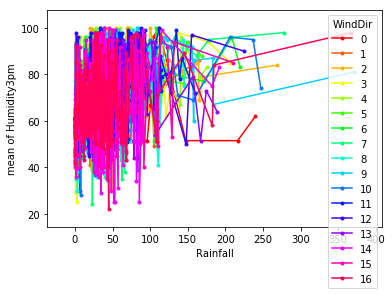

In [408]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(df.Rainfall, df.WindDir, df.Humidity3pm)



## Stepwise Regression using Recursive Feature Elimination
#### Given an external estimator that assigns weights to features , the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features and give the ranking to each feature accordingly.

In [409]:
from sklearn.feature_selection import RFE, f_regression
#stop the search when only the last feature is left
rfe = RFE(reg, n_features_to_select=3, verbose =3 )
fit = rfe.fit(X,y)
print("Rankings: ", fit.ranking_)
print("Support: ", fit.support_)


Fitting estimator with 5 features.
Fitting estimator with 4 features.
Rankings:  [2 1 3 1 1]
Support:  [False  True False  True  True]


#### This shows that Sunshine and RainTomorrow are the best features for predicting Humidity3pm.

#### Perfoming stepwise regression manually:
#### It is used to handle overfitting and perform feature selection work well with a small set of features. Here we have used backward elimination which involves all candidate variables and testing the deletion of each variable using a chosen model fit criterion.

In [410]:
#step1
ystep= df[['Humidity3pm']]
xstep= df[['Humidity9am','Cloud3pm','Evaporation','RainTomorrow','WindDir','Temp3pm', 'Sunshine', 'Temp9am', 'Cloud9am']]

In [411]:
regressor_OLS = sm.OLS(endog = ystep, exog = xstep).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Humidity3pm   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 5.132e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        02:50:40   Log-Likelihood:            -5.2304e+05
No. Observations:              142193   AIC:                         1.046e+06
Df Residuals:                  142184   BIC:                         1.046e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Humidity9am      0.7148      0.001    551.969      0.000       0.712       0.717
Cloud3pm         1.1769      0.015     78.502      0.000       1.148       1.206
Evaporation      0.0850      0.009      9.242      0.000       0.067       0.103
RainTomorrow     5.3826      0.068     79.347      0.000       5.250       5.516
WindDir         -0.0616      0.005    -11.797      0.000      -0.072      -0.051
Temp3pm         -2.8187      0.007   -380.357      0.000      -2.833      -2.804
Sunshine         0.6512      0.011     60.607      0.000       0.630       0.672
Temp9am          2.9527      0.008    370.325      0.000       2.937       2.968
Cloud9am         0.3326      0.014     23.056      0.000       0.304       0.361
==============================================================================
Omnibus:                     9276.997   Durbin-Watson:                   1.522
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44860.432
Skew:                          -0.059   Prob(JB):                         0.00
Kurtosis:                       5.749   Cond. No.                         206.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [412]:
x_train_step,x_test_step,y_train_step,y_test_step = train_test_split(xstep, ystep, random_state=3)
regressor = LinearRegression()
regressor.fit(x_train_step,y_train_step)
accuracy = regressor.score(x_test_step, y_test_step)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 81%'

In [413]:
#step2
ystep2= df[['Humidity3pm']]
xstep2= df[['Humidity9am','Cloud3pm','Evaporation','RainTomorrow','WindDir','Temp3pm', 'Sunshine']]

In [414]:
regressor_OLS1 = sm.OLS(endog = ystep2, exog = xstep2).fit()
regressor_OLS1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Humidity3pm   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 3.222e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        02:50:40   Log-Likelihood:            -5.7181e+05
No. Observations:              142193   AIC:                         1.144e+06
Df Residuals:                  142186   BIC:                         1.144e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Humidity9am      0.6363      0.002    388.701      0.000       0.633       0.640
Cloud3pm         2.2011      0.019    116.819      0.000       2.164       2.238
Evaporation      0.4659      0.013     36.203      0.000       0.441       0.491
RainTomorrow    11.2176      0.093    120.590      0.000      11.035      11.400
WindDir         -0.0892      0.007    -12.182      0.000      -0.104      -0.075
Temp3pm         -0.4575      0.005    -83.804      0.000      -0.468      -0.447
Sunshine         0.3867      0.015     26.325      0.000       0.358       0.415
==============================================================================
Omnibus:                      228.076   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.831
Skew:                           0.088   Prob(JB):                     2.76e-51
Kurtosis:                       3.091   Cond. No.                         196.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [415]:
x_train_step2,x_test_step2,y_train_step2,y_test_step2 = train_test_split(xstep2, ystep2, random_state=3)
regressor = LinearRegression()
regressor.fit(x_train_step2,y_train_step2)
accuracy = regressor.score(x_test_step2, y_test_step2)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 60%'

### From the correlation matrix, heatmap and VIF we indicate that there is no multicolinearity in the model. In the multiple regression model the predictor variables are independent of all the other variables. Using RFE we have ranked the most significant features and eliminated the others.

## Logistic regression
#### RainTomorrow as dependent binary variable

### Visualization of data

In [416]:
df['RainTomorrow'].value_counts()

0    110316
1     31877
Name: RainTomorrow, dtype: int64

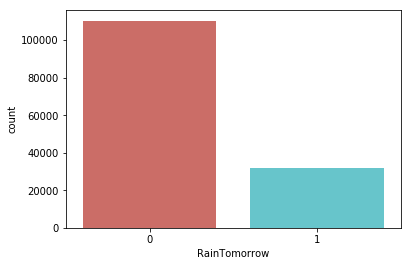

In [417]:
sns.countplot(x='RainTomorrow',data=df, palette='hls')
plt.show()

Text(0, 0.5, 'Rain Tomorrow')

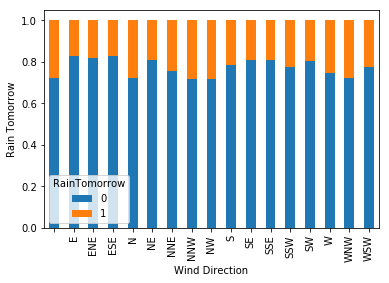

In [418]:
table=pd.crosstab(df.WindDir3pm,df.RainTomorrow)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.xlabel('Wind Direction')
plt.ylabel('Rain Tomorrow')

### Assumptions for logistic regression: 

#### 1. Dependent variable should be binary

In [ ]:
sns.pairplot(df)


#### 2. Continuous IVs being Linearly Related to the Log Odds:
#### The continuous IV(s) does not require to be linearly related to the Dependent variable. It does require the continuous IV(s) be linearly related to the log odds of the IV though. We look for an S-shaped curve by using the reg plot.

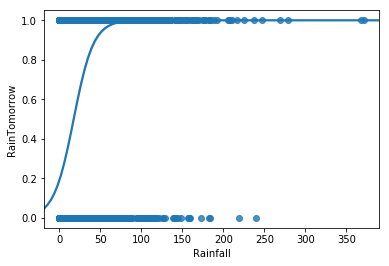

In [444]:
sns.regplot(x="Rainfall", y="RainTomorrow", data=df, logistic= True).set_title("Log Odds Linear Plot")

Text(0.5, 1.0, 'Log Odds Linear Plot')

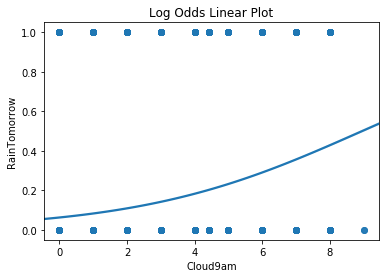

In [449]:
sns.regplot(x="Cloud9am", y="RainTomorrow", data=df, logistic= True).set_title("Log Odds Linear Plot")

#### 3. Absence of Multicollinearity by using correlation matrix

In [447]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow,trans_loc,WindDir,Sum
MinTemp,1.000000,0.735678,0.103808,0.353938,0.051941,0.177285,0.176005,0.175749,-0.232586,0.005920,...,-0.461623,0.061539,0.015924,0.898633,0.700962,0.124743,0.083936,-0.006202,-0.145823,-0.230043
MaxTemp,0.735678,1.000000,-0.074202,0.442214,0.331505,0.067679,0.014662,0.050760,-0.499777,-0.499725,...,-0.427066,-0.226776,-0.214469,0.880087,0.969735,-0.044154,-0.159087,-0.020490,-0.158061,-0.361409
Rainfall,0.103808,-0.074202,1.000000,-0.038186,-0.173011,0.132772,0.086403,0.057454,0.221392,0.249609,...,-0.126114,0.171613,0.145848,0.011384,-0.077553,0.301844,0.236874,-0.003457,0.042696,0.136124
Evaporation,0.353938,0.442214,-0.038186,1.000000,0.290375,0.151093,0.142050,0.094557,-0.377594,-0.289915,...,-0.231705,-0.152224,-0.147763,0.417323,0.429195,-0.031569,-0.089551,0.032114,-0.038017,-0.199884
Sunshine,0.051941,0.331505,-0.173011,0.290375,1.000000,-0.023158,0.005691,0.039592,-0.351980,-0.446849,...,-0.015491,-0.537714,-0.559379,0.210174,0.349271,-0.222487,-0.327029,0.002144,-0.024654,-0.178437
WindGustSpeed,0.177285,0.067679,0.132772,0.151093,-0.023158,1.000000,0.604837,0.686419,-0.214012,-0.026464,...,-0.412922,0.054735,0.083344,0.149774,0.032836,0.162923,0.234010,0.072039,0.150576,0.039799
WindSpeed9am,0.176005,0.014662,0.086403,0.142050,0.005691,0.604837,1.000000,0.519971,-0.269647,-0.031124,...,-0.174916,0.019193,0.041145,0.129119,0.005048,0.069404,0.090995,0.077313,0.072950,-0.039871
WindSpeed3pm,0.175749,0.050760,0.057454,0.094557,0.039592,0.686419,0.519971,1.000000,-0.145216,0.015834,...,-0.254988,0.041751,0.019822,0.163201,0.028514,0.049240,0.087817,0.064784,0.124321,0.048991
Humidity9am,-0.232586,-0.499777,0.221392,-0.377594,-0.351980,-0.214012,-0.269647,-0.145216,1.000000,0.659852,...,0.185988,0.354394,0.274613,-0.471137,-0.492430,0.170541,0.255158,-0.002065,0.004543,0.445265
Humidity3pm,0.005920,-0.499725,0.249609,-0.289915,-0.446849,-0.026464,-0.031124,0.015834,0.659852,1.000000,...,0.051302,0.400006,0.407898,-0.217593,-0.555777,0.306711,0.439678,0.011066,-0.018472,0.276757


#### 4. Lack of outliers using box plot

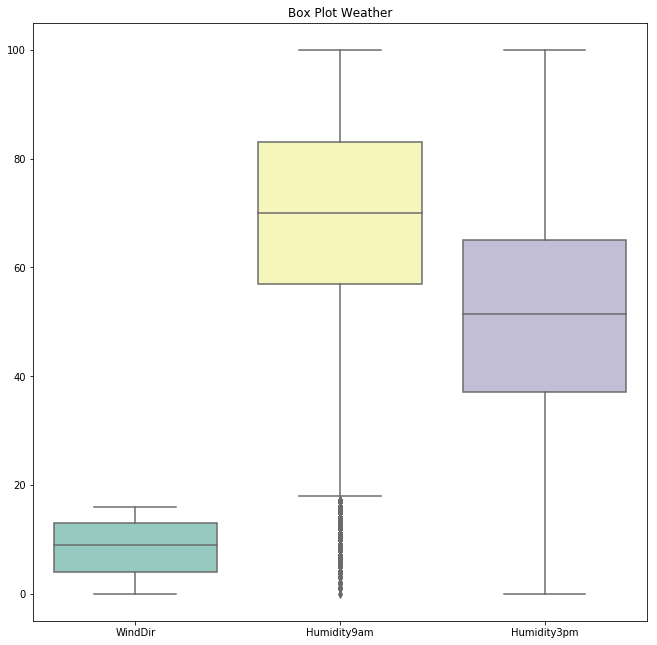

In [450]:
f, ax = plt.subplots(figsize=(11, 11))
chk=df[[ 'WindDir','Humidity9am','Humidity3pm']]


plt.title("Box Plot Weather")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = df[['WindDir','Humidity9am','Humidity3pm']], orient = 'v', palette = 'Set3')

#### Since WindDir and Humidity3pm have no outliers and Humidity9am have very few outliers so we can choose them for logistic regression to predict RainTomorrow.

### Normality Test

In [420]:
nl = "\n"
stats.chi2_contingency(table)
chi2, p, dof, expected= stats.chi2_contingency(table)
print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

Chi2 value= 1341.5739256662762
p-value= 5.876710288815412e-276
Degrees of freedom= 16



In [421]:
stats.chi2_contingency(table)

(1341.5739256662762,
 5.876710288815412e-276,
 16,
 array([[2931.04335656,  846.95664344],
        [6471.8802754 , 1870.1197246 ],
        [5992.42426842, 1731.57573158],
        [6502.91302666, 1879.08697334],
        [6724.02137939, 1942.97862061],
        [6333.78453229, 1830.21546771],
        [4999.37622808, 1444.62377192],
        [5999.40663746, 1733.59336254],
        [6569.63344187, 1898.36655813],
        [7446.30866498, 2151.69133502],
        [8272.5556673 , 2390.4443327 ],
        [7092.53530061, 2049.46469939],
        [6214.30843994, 1795.69156006],
        [7123.56805187, 2058.43194813],
        [7689.1399436 , 2221.8600564 ],
        [6715.4873728 , 1940.5126272 ],
        [7237.61341276, 2091.38658724]]))

## Fitting the model

In [422]:
cols_to_use = ['Temp9am', 'Sunshine', 'WindDir','Rainfall','Humidity3pm']
X_log = df[cols_to_use]
y_log = df.RainTomorrow

In [423]:
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.3, random_state = 1)
X_log_train, X_log_test, y_log_train

(          Temp9am   Sunshine  WindDir   Rainfall  Humidity3pm
 73271   13.200000   5.900000       10   4.400000         64.0
 74880   13.600000   5.000000        9   0.000000         75.0
 26154   12.000000   7.624853       15   0.000000         30.0
 117990  22.000000  10.500000        1   0.000000         17.0
 15162   23.800000   7.624853        9   0.000000         67.0
 141737  25.600000   7.624853       15   0.000000         33.0
 97826   10.500000   3.400000       10   0.200000         65.0
 65376   10.900000   4.500000        8   0.200000         56.0
 21305   20.700000   7.800000       16   0.200000         64.0
 132288  13.500000   7.624853        7   0.000000         40.0
 96378   15.500000   7.624853       13   0.600000         42.0
 82742   13.600000   9.600000       11   0.000000         45.0
 131711  17.700000   7.624853       10  15.900000         52.0
 97010   18.800000   9.500000        1   0.000000         39.0
 127346  18.800000   2.400000        7   0.400000      

In [424]:
LogReg = LogisticRegression()
LogReg.fit(X_log_train, y_log_train)

c:\users\dsinf\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [425]:
y_pred = LogReg.predict(X_log_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [426]:
X_log_test

,Temp9am,Sunshine,WindDir,Rainfall,Humidity3pm
64882,18.5,8.900000,11,21.4,54.000000
96814,17.7,7.624853,16,0.0,36.000000
85767,20.8,6.100000,10,7.4,57.000000
73206,15.6,0.000000,3,4.2,74.000000
123872,17.4,7.624853,10,0.0,70.000000
49566,16.0,7.624853,2,0.0,66.000000
115929,11.0,6.800000,13,8.2,65.000000
72765,15.4,13.800000,11,0.0,56.000000
141027,21.2,7.624853,3,0.0,21.000000
23105,24.4,7.600000,3,3.6,82.000000


In [427]:
np.array(X_log_test)

array([[18.5       ,  8.9       , 11.        , 21.4       , 54.        ],
       [17.7       ,  7.62485311, 16.        ,  0.        , 36.        ],
       [20.8       ,  6.1       , 10.        ,  7.4       , 57.        ],
       ...,
       [16.7       ,  7.62485311,  7.        ,  0.        , 61.        ],
       [19.6       , 12.5       ,  9.        ,  0.        , 41.        ],
       [26.7       , 11.        ,  4.        ,  0.        , 57.        ]])

In [428]:
#to measure the performance of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_log_test, y_pred)
confusion_matrix

array([[31488,  1651],
       [ 5719,  3800]], dtype=int64)

#### It is a matrix between the actual and predicted observations. Here 1651 + 5719 are false positive and false negative values(incorrect predictions), 31488 + 3800 are true positive and true negative values(correct predictions)

In [429]:
from sklearn.metrics import classification_report
print(classification_report(y_log_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     33139
           1       0.70      0.40      0.51      9519

   micro avg       0.83      0.83      0.83     42658
   macro avg       0.77      0.67      0.70     42658
weighted avg       0.81      0.83      0.81     42658



#### Here we get a summary of prediction results on a classification problem. 
#### Recall gives us an idea about when it’s actually yes, how often does it predict yes.  High Recall indicates the class is correctly recognized (small number of FN).
#### Precsion tells us about when it predicts yes, how often is it correct. High Precision indicates an example labeled as positive is indeed positive (small number of FP).
#### F-measure of a test's accuracy. It will always be nearer to the smaller value of Precision or Recall.


In [430]:
model_log = sm.Logit(y_log, X_log).fit()
model_log.summary()

Optimization terminated successfully.
         Current function value: 0.431332
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:               142193
Model:                          Logit   Df Residuals:                   142188
Method:                           MLE   Df Model:                            4
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  0.1895
Time:                        02:57:44   Log-Likelihood:                -61332.
converged:                       True   LL-Null:                       -75668.
                                        LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Temp9am        -0.0186      0.001    -18.567      0.000      -0.021      -0.017
Sunshine       -0.3020      0.002   -124.092      0.000      -0.307      -0.297
WindDir        -0.0390      0.001    -27.406      0.000      -0.042      -0.036
Rainfall        0.0460      0.001     42.765      0.000       0.044       0.048
Humidity3pm     0.0264      0.000     88.092      0.000       0.026       0.027
===============================================================================
"""

#### We observe that p-value <0.05, we reject the null hypothesis that β = 0.


In [431]:
#coefficients of the model, how well those coefficients fit, the overall fit quality, and other statistical measures.
model_log.conf_int()

,0,1
Temp9am,-0.020521,-0.016602
Sunshine,-0.306765,-0.297225
WindDir,-0.041793,-0.036215
Rainfall,0.043918,0.048137
Humidity3pm,0.025791,0.026965


In [432]:
#exponential of each of the coefficients to generate the odds ratios
np.exp(model_log.params)

Temp9am        0.981610
Sunshine       0.739342
WindDir        0.961747
Rainfall       1.047103
Humidity3pm    1.026729
dtype: float64

In [433]:
#This tells you how a 1 unit increase or decrease in a variable affects the odds of being admitted.
params = model_log.params
conf = model_log.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OddRatio']
np.exp(conf)

,2.5%,97.5%,OddRatio
Temp9am,0.979689,0.983535,0.981610
Sunshine,0.735824,0.742877,0.739342
WindDir,0.959068,0.964433,0.961747
Rainfall,1.044897,1.049315,1.047103
Humidity3pm,1.026127,1.027332,1.026729


In [434]:
y_pred = LogReg.predict(X_log_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(X_log_test, y_log_test)))

Accuracy of logistic regression classifier on test set: 0.83


### Plotting the predictions using the receiver operating characteristic (ROC) 

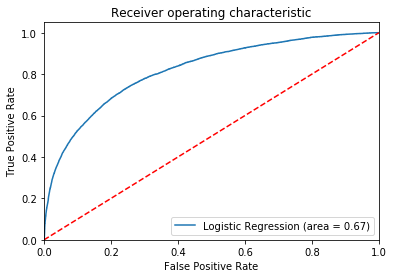

In [435]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_log_test, LogReg.predict(X_log_test))
fpr, tpr, thresholds = roc_curve(y_log_test, LogReg.predict_proba(X_log_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible.

#### The model makes sense because the accuracy is quite high whicch 83%. From the summary reports and assumptions we can say that there is significant relationship between the indepedent variables and dependent variable which helps for analysis. 

## Cross Validation

In [436]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogReg, X_log, y_log, cv=5)
scores

c:\users\dsinf\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dsinf\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dsinf\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dsinf\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dsinf\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

array([0.83073136, 0.83350329, 0.80772206, 0.8258668 , 0.82857444])

In [437]:
print("Mean 5-Fold R Squared: {}".format(np.mean(scores)))

Mean 5-Fold R Squared: 0.8252795909275175


In [438]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.83 (+/- 0.02)


#### The accuracy of the model by cross validation is 83% which gives us a good fit model. 

#### By looking at the classification reports , regression results and the accuracy we can say that there is significant relationship between the dependent and independent variables.

In [439]:
LRm = LogReg.fit(X_log_train, y_log_train)

c:\users\dsinf\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [440]:
# Predict confidence scores for samples.
LRm.decision_function(X_log_test)

array([-0.92269753, -2.43958597, -0.77151209, ..., -1.27023128,
       -3.01695434, -1.75420274])

In [441]:
LRm.predict(X_log_test)

array([0, 0, 0, ..., 0, 0, 0])

#### The predicted values i.e the outcome variable is binary .

##  Regularization for linear regression
#### Regularizes size of the coefficients, thus "shrinking" them towards zero and minimizes overfitting. Here we have used L2 regularization method which minimize the sum of squared residuals and also penalize the size of parameter estimates, in order to shrink them towards zero. It basically adds “squared magnitude” of coefficient as penalty term to the loss function

In [442]:
from sklearn.linear_model import Ridge
print(X_train.shape)
print(y_train.size)
model_ridge = linear_model.Ridge()
model_ridge.fit(X_train,y_train)
model_ridge.score(X_train,y_train)


(99535, 5)
99535


0.5476274000284347

#### The score after performing regularization in linear model is 0.5476 .

(42658,)
(42658,)


Text(0.5, 1.0, 'Ridge Regression - Humidity vs Predicted Humidity: $Y_i$ vs $\\hat{y}_i$')

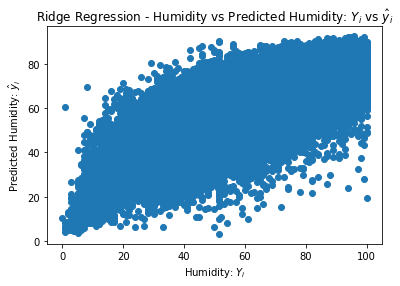

In [443]:
y_pred = model_ridge.predict(X_test)
print(y_test.shape)
print(y_pred.shape)
plt.scatter(y_test, y_pred)
plt.xlabel("Humidity: $Y_i$")
plt.ylabel("Predicted Humidity: $\hat{y}_i$")
plt.title("Ridge Regression - Humidity vs Predicted Humidity: $Y_i$ vs $\hat{y}_i$")

#### The above scatter plot shows that the data can be fit into linear model.